<a href="https://www.kaggle.com/code/harshilamin2102/eda-customer-churn?scriptVersionId=214399402" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#TotalCharges have string as dtype which is wrong

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
churn_count=df['Churn'].value_counts()
churn_count

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of customers')

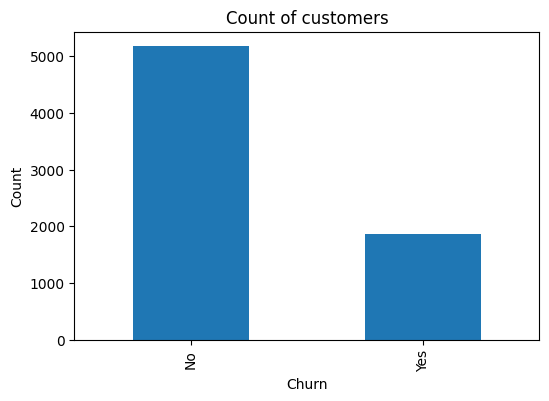

In [10]:
churn_count.plot(kind='bar',figsize=(6,4))
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count of customers')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
new_df=df.copy()

In [13]:
new_df.TotalCharges=pd.to_numeric(new_df.TotalCharges,errors='coerce')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now Total carges is in float but has some missing values so we will fill it with mean value

In [14]:
new_df.TotalCharges.fillna(new_df.TotalCharges.mean())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [15]:
new_df.tenure.max()

72

In [16]:
lables=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
new_df['Tenure_group']=pd.cut(new_df.tenure,range(1,80,12),right=False,labels=lables)

In [17]:
new_df.Tenure_group.value_counts()

Tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [18]:
new_df.drop(columns=['tenure','customerID'],axis=1,inplace=True)

In [19]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


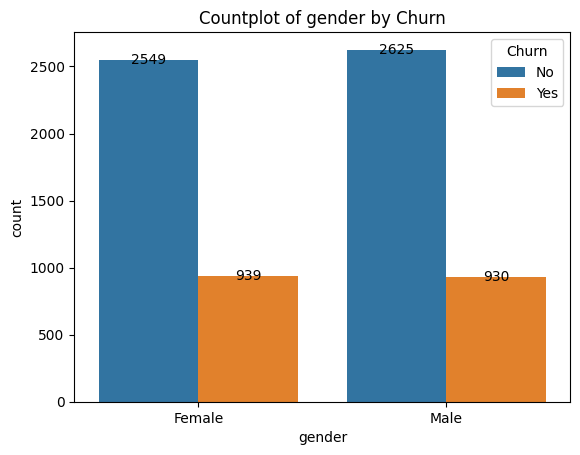

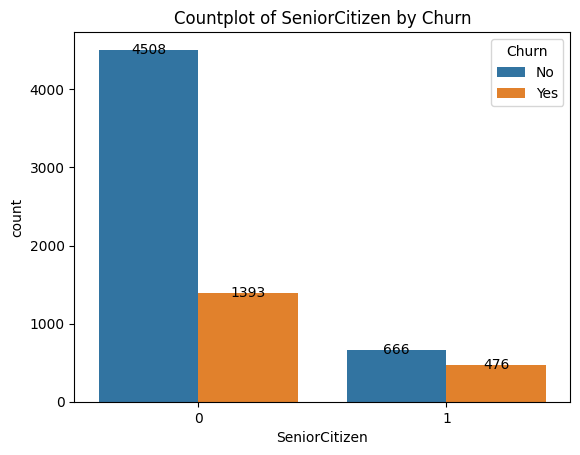

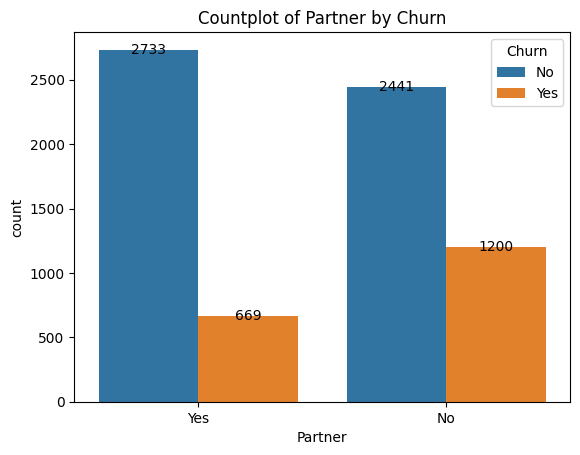

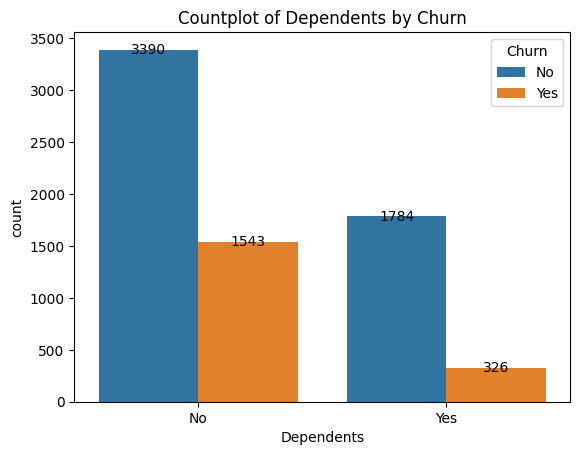

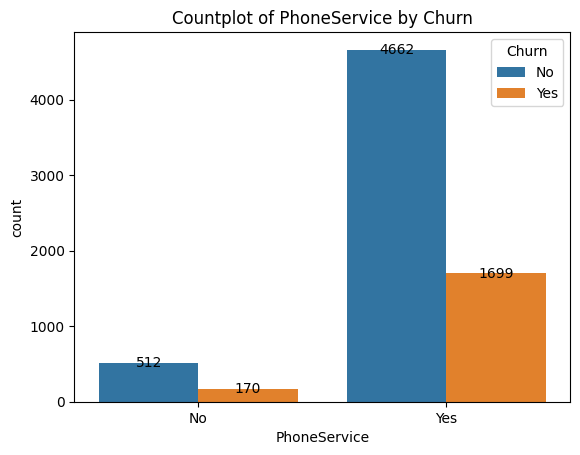

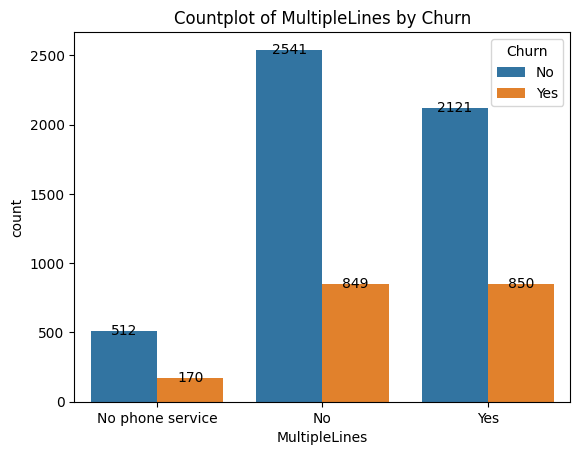

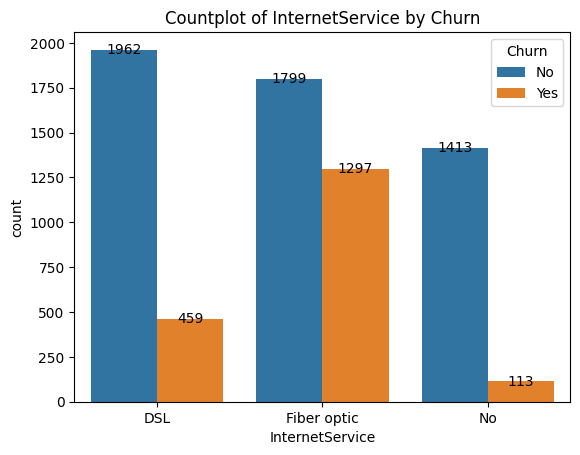

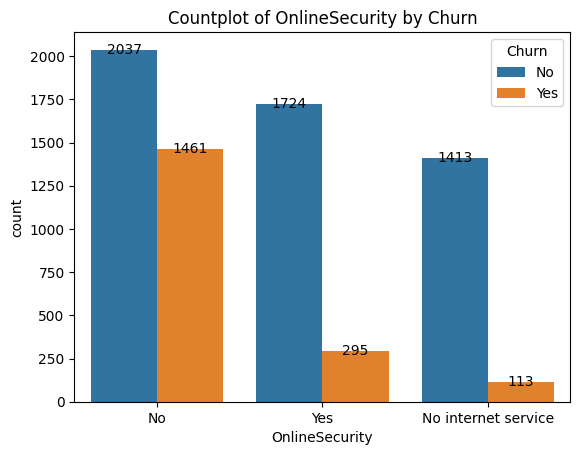

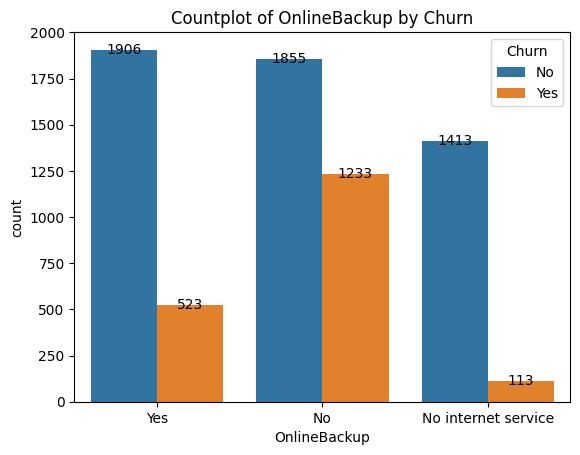

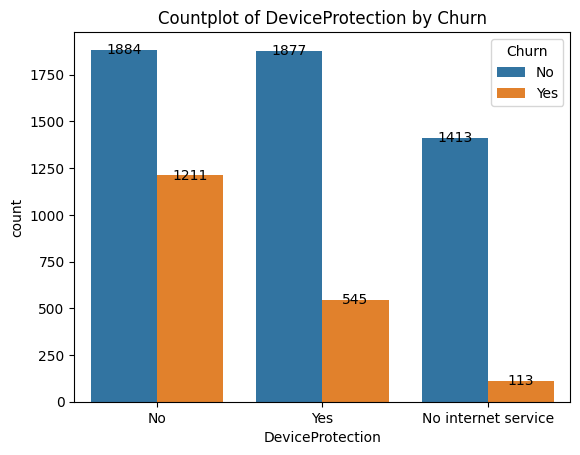

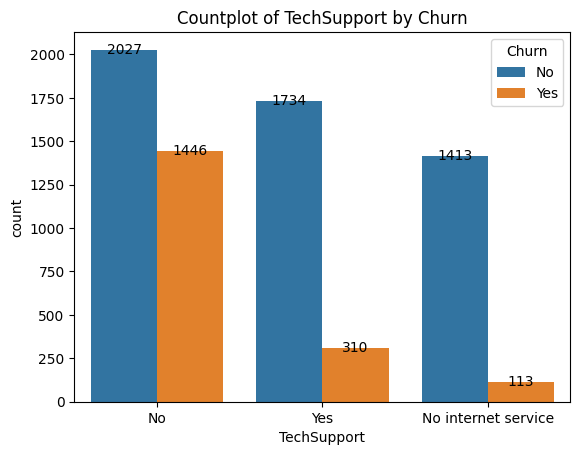

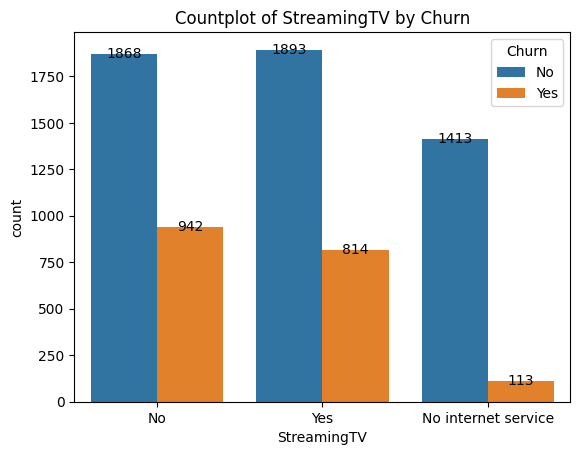

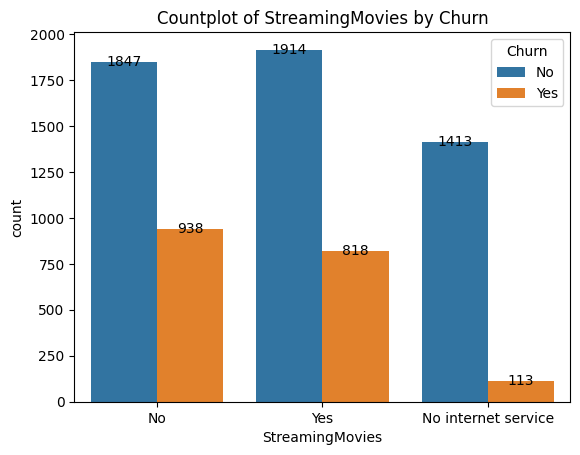

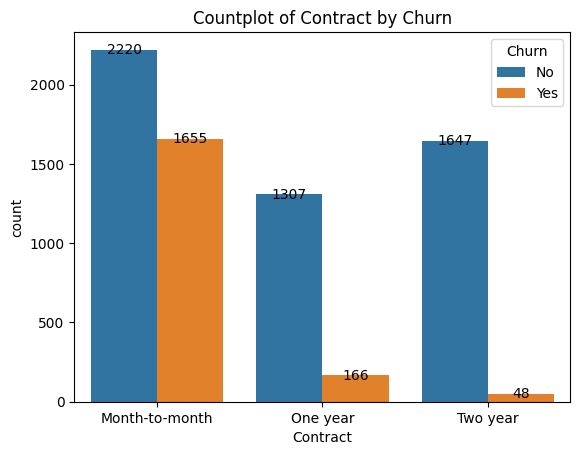

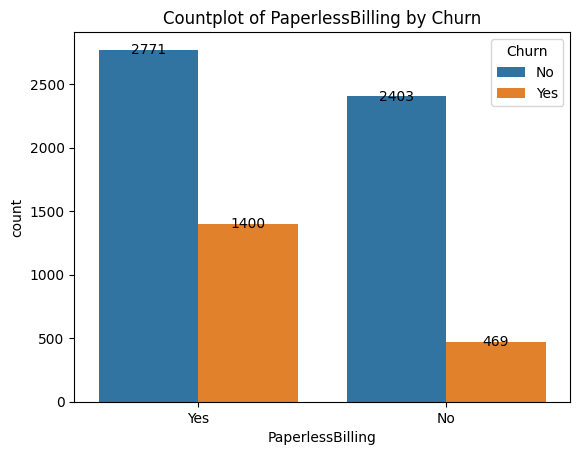

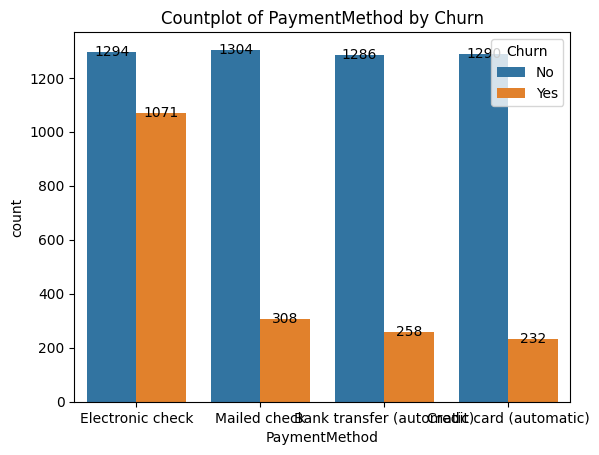

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


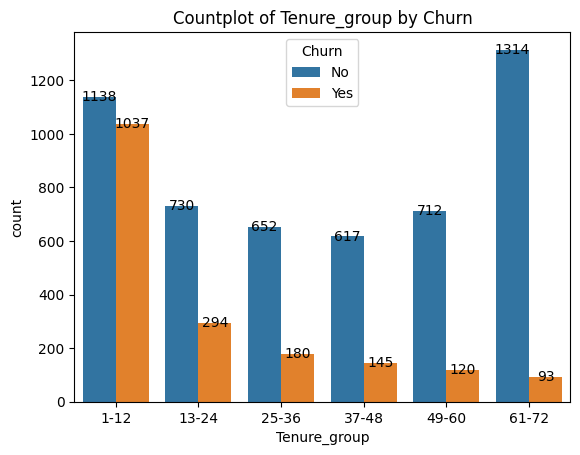

In [20]:
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    ax = sns.countplot(data=new_df, x=predictor, hue='Churn')
    
    # Annotate the bars with their counts
    for p in ax.patches:
        count = int(p.get_height())  # Get the height of the bar
        if count > 0:  # Only annotate if count is greater than 0
            ax.text(p.get_x() + p.get_width() / 2.,  # X-coordinate
                    p.get_height() + 0.5,           # Y-coordinate
                    f'{count}',                    # Text to display
                    ha='center',                   # Horizontal alignment
                    va='center',                   # Vertical alignment
                    fontsize=10)                   # Font size
    
    plt.title(f'Countplot of {predictor} by Churn')
    plt.show()


### Univariate Analysis

- **Gender**: The male-to-female ratio is the **same** for churned and non-churned customers.  
- **Senior Citizen**: **Senior Citizens** are significantly more likely to churn.(71%)  
- **Partner**: Customers with **no partner** are more likely to churn.(50%)
- **Dependents**: Customers with **no dependents** are more likely to churn.(45%)
- **Phone Services**: The rato is **same**
- **Multiple Lines**: The rato is **same**
- **Internet Service**: Customer with **fiber optic** is more likely to churn(72%)
- **Online Security**:Customer with **No Security** is more likely to churn(71%)
- **Online Backup**:Customer with **No Backup** is more likely to churn(66%)
- **Device Protection**:Customer with **No Protection** is more likely to churn(64%)
- **Tech Support**:Customer with **No Support** is more likely to churn(71%)
- **Streaming Tv**: The rato is **same**
- **Streaming Movies**: The rato is **same**
- **Contract**:Customer with **Month-to-Month contract** is more likely to churn(74%)
- **Paperless Billing**:Customer with **Paperless Billing** is more likely to churn(50%)
- **Payment Method**:Customer with **Electronic Check** is more likely to churn(83%)
- **Tenure Group**:Customer with Tenure Group **1-12** is more likely to churn(91%)

In [21]:
new_df_dummies=pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,Tenure_group_1-12,Tenure_group_13-24,Tenure_group_25-36,Tenure_group_37-48,Tenure_group_49-60,Tenure_group_61-72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,True,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,True,True,False,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,True,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,True,False,False,True,True,False,False,False,False,False


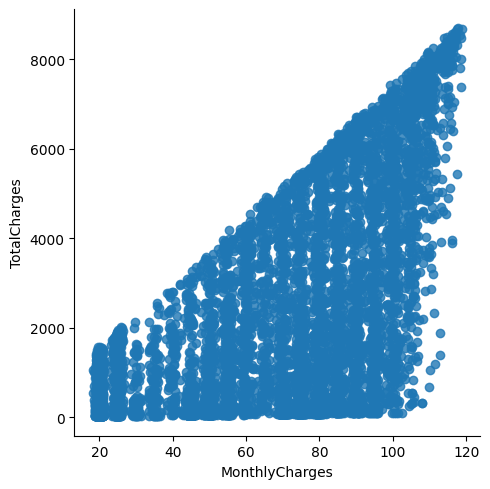

In [22]:
sns.lmplot(data=new_df_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

In [23]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6510648032262027

**TotalCharges increases as the MonthlyCharges increases**

<ipython-input-24-057fd5d36b7c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn_No'])],
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-24-057fd5d36b7c>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn_Yes'])],
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operat

Text(0.5, 1.0, 'Monthly Charges by churn')

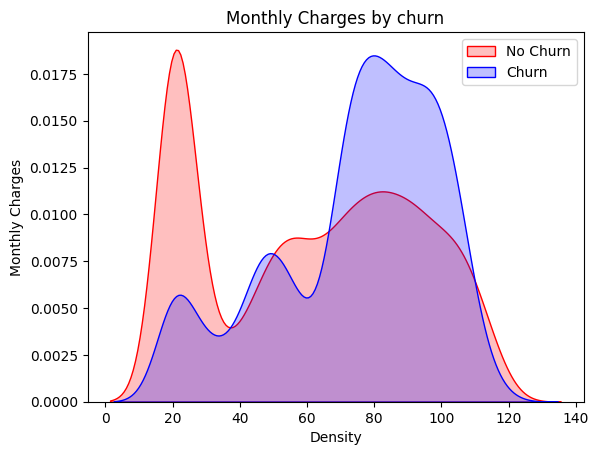

In [24]:
Mth=sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn_No'])],
               color='Red',shade=True)
Mth=sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn_Yes'])],
               ax=Mth,color='Blue',shade=True)
Mth.legend(['No Churn','Churn'],loc='upper right')
Mth.set_xlabel('Density')
Mth.set_ylabel('Monthly Charges')
Mth.set_title('Monthly Charges by churn')

**Churn is high when monthly charges are high**

<ipython-input-25-fa70361fc68c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn_No'])],
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-25-fa70361fc68c>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn_Yes'])],
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating 

Text(0.5, 1.0, 'Total Charges by churn')

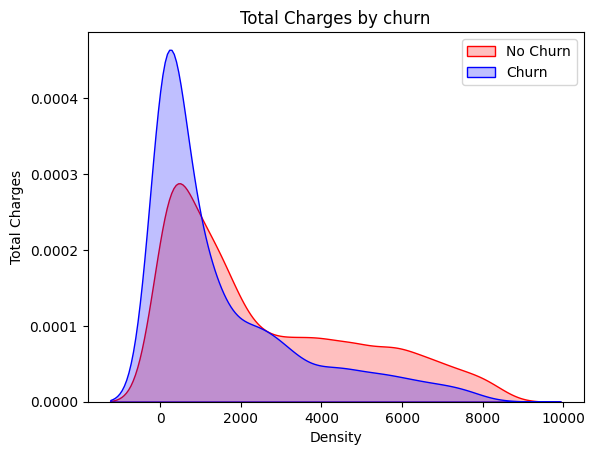

In [25]:
tot=sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn_No'])],
               color='Red',shade=True)
tot=sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn_Yes'])],
               ax=tot,color='Blue',shade=True)
tot.legend(['No Churn','Churn'],loc='upper right')
tot.set_xlabel('Density')
tot.set_ylabel('Total Charges')
tot.set_title('Total Charges by churn')